In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
 
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pylab as plt
import tqdm
 
from sklearn.utils import resample
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy import stats
 
from pygam import LinearGAM, s, l
from pygam.datasets import wage
 
from dmba import stepwise_selection
from dmba import AIC_score
 
 
from matplotlib import rc, font_manager
font_path = '/Library/Fonts/NanumGothicBold.ttf'
fontprop = font_manager.FontProperties(fname=font_path, size=14)
 
from IPython.display import Image

/Users/a201808004/opt/anaconda3/envs/ds37/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 분포 볼 때 사용할 함수
def plot_dist(x, bins, hist = True, kde = None, label = None, color=None, line_median = None, line_mean = None, x_format = False, y_format = False):
  data = np.asarray(x)
  sns.set(rc = {"figure.figsize": (20, 10)})
  ax = sns.distplot(data, bins = int(round((abs(data.max()) - abs(data.min())) * bins,1)), hist = hist, kde = kde, label = label, color=color)
  
  if line_median is None and line_mean is None:
    pass
  elif line_median is not None and line_mean is None:
    plt.axvline(round(np.median(data), 2), 1, 0, color = 'red', ls = '--', alpha = 0.5)
    plt.text(x = np.median(data), y = line_median, s = "Median:" + str(round(np.median(data), 3)), bbox = dict(facecolor = 'red', alpha = 0.3), fontsize = 14)
  elif line_median is None and line_mean is not None:
    plt.axvline(round(np.mean(data), 2), 1, 0, color = 'blue', ls = '--', alpha = 0.5)
    plt.text(x = np.mean(data), y = line_mean, s = "Mean:" + str(round(np.mean(data), 3)), bbox = dict(facecolor = 'blue', alpha = 0.3), fontsize = 14)
  else:
    plt.axvline(round(np.median(data), 2), 1, 0, color = 'red', ls = '--', alpha = 0.5)
    plt.axvline(round(np.mean(data), 2), 1, 0, color = 'blue', ls = '--', alpha = 0.5)
    plt.text(x = np.median(data), y = line_median, s = "Median:" + str(round(np.median(data), 3)), bbox = dict(facecolor = 'red', alpha = 0.3), fontsize = 14)
    plt.text(x = np.mean(data), y = line_mean, s = "Mean:" + str(round(np.mean(data), 3)), bbox = dict(facecolor = 'blue', alpha = 0.3), fontsize = 14)
  if y_format is True:
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
  if x_format is True:
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    
def plot_title(title, xlabel, ylabel, fontproperties = None, fontsize = None):
  plt.title(label = title, fontproperties = fontproperties, fontsize = fontsize)
  plt.xlabel(xlabel = xlabel, fontproperties = fontproperties, fontsize = fontsize)
  plt.ylabel(ylabel = ylabel, fontproperties = fontproperties, fontsize = fontsize)

In [ ]:
lung = pd.read_csv('./data/LungDisease.csv')
house = pd.read_csv('./data/LungDisease.csv')

# 단순선형회귀

- 회귀분석
  - 회귀(Regression)란 말은 어딘가로 돌아간다는 의미
  - 도대체 어디로 돌아가길래 이런 이름이 붙었을까?
- 회귀분석의 목적
  - 주어진 (독립)변수로 (종속)변수를 <span style="color:orange">**예측**</span>하기 위해
  - 단순회귀(Simple Regression)
    - 독립변수 1개 & 종속변수 1개
  - 다중회귀(Mutiple Regression)
    - 독립변수 2개 이상 & 종속변수 1개

## 회귀식

- $ Y= b_0 + b_1X $
  - X가 얼만큼 변하면 Y가 어느 정도 변하는지를 추정하기 위한 식
  - $b_0$: 절편(intercept)
  - $b_1$: 기울기(slope)
- 우리가 회귀식을 만드는 이유는 무엇인가? 혹은 굳이 회귀분석을 하지 않고 상관관계만 봐서는 안 되는가?

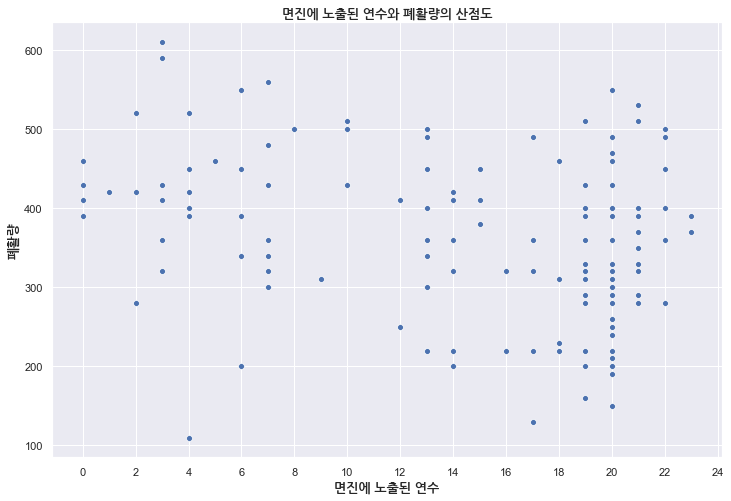

In [ ]:
sns.set(rc = {"figure.figsize": (12, 8)})
sns.scatterplot(data=lung, x='Exposure', y='PEFR')
plot_title(title='면진에 노출된 연수와 폐활량의 산점도', xlabel='면진에 노출된 연수', ylabel='폐활량', fontproperties=fontprop, fontsize=13)
plt.xticks(np.linspace(0, 24, 13));

In [ ]:
# scikit-learn으로 회귀식을 만든 결과
predictors = ['Exposure']
outcome = 'PEFR'

model = LinearRegression()
model.fit(lung[predictors], lung[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


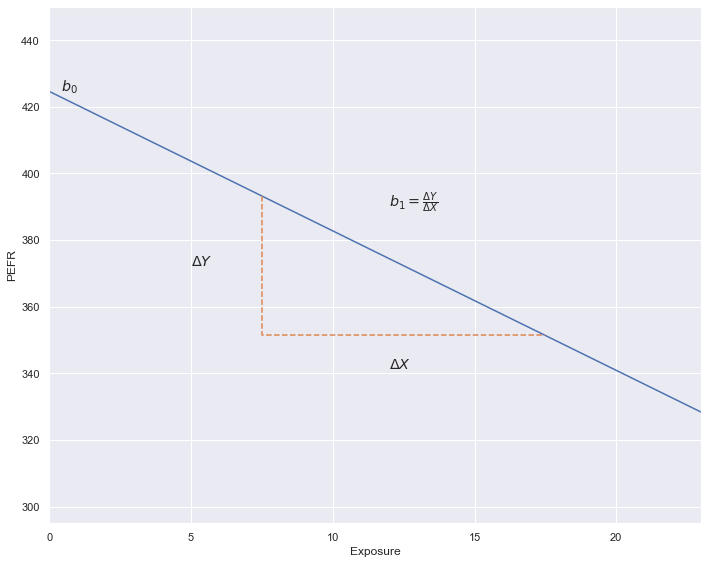

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(0, 23)
ax.set_ylim(295, 450)
ax.set_xlabel('Exposure')
ax.set_ylabel('PEFR')
ax.plot((0, 23), model.predict([[0], [23]]))
ax.text(0.4, model.intercept_, r'$b_0$', size='larger')

x = [[7.5], [17.5]]
y = model.predict(x)
ax.plot((7.5, 7.5, 17.5), (y[0], y[1], y[1]), '--')
ax.text(5, np.mean(y), r'$\Delta Y$', size='larger')
ax.text(12, y[1] - 10, r'$\Delta X$', size='larger')
ax.text(12, 390, r'$b_1 = \frac{\Delta Y}{\Delta X}$', size='larger')

plt.tight_layout()
plt.show()

## 적합값과 잔차

- 합리적인 추세선, 즉 회귀식을 만들기 위해 필요한 것?
  - 최소제곱법(Ordinary Least Square)
  - <span style="color:orange">**오차의 제곱합을 최소로 만드는 방법**</span>이며, 회귀분석에서는 이를 잔차제곱합(RSS; Residual Sum of Squares) 혹은 오차제곱합(SSE; Sum of Square Error)이라 부른다.
- $RSS = \sum_{i=1}^n (Y_i - \hat{Y_i})^2 = \sum_{i=1}^n (Y_i - \hat{b_0} - \hat{b_1}X_i)^2$
- $ {\displaystyle \hat{b_1} = \frac{\sum_{i=1}^n (Y_i-\bar{Y})(X_i-\bar{X})}{\sum_{i=1}^n (X_i-\bar{X})^2}} $
- 최소제곱법으로 구해진 직선의 의미와 한계
  - 이 직선은 평균을 지난다. 즉 평균으로 회귀한다고 해서 회귀분석이라 불린다.
  - 회귀에서 최소제곱이 널리 쓰인 이유는 계산의 편의성 때문이다. 하지만 최소제곱은 평균과 마찬가지로 <span style="color:orange">특잇값</span>에 매우 민감하다.
  - [OLS의 계산 방법](https://darkpgmr.tistory.com/56)
---
<img src="../image/simple_regression.jpeg" align="left">

In [ ]:
fitted = model.predict(lung[predictors])
residuals = lung[outcome] - fitted

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


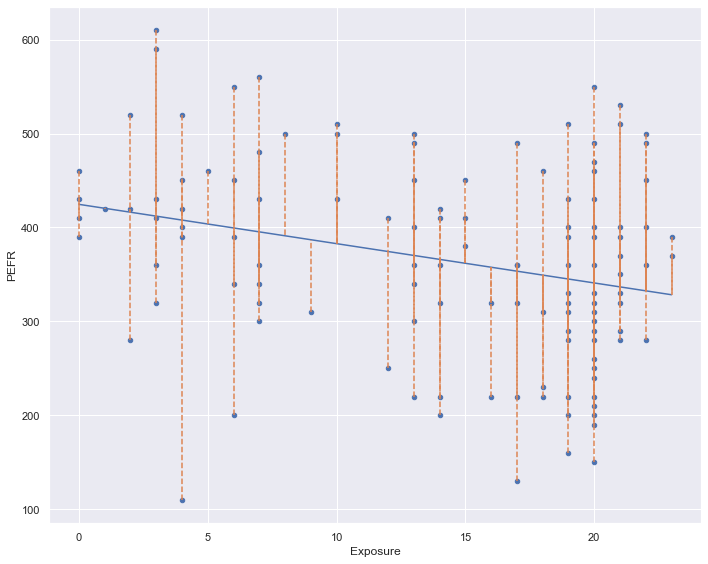

In [ ]:
ax = lung.plot.scatter(x='Exposure', y='PEFR', figsize=(10, 8))
ax.plot(lung.Exposure, fitted)
for x, yactual, yfitted in zip(lung.Exposure, lung.PEFR, fitted): 
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()

$ {\displaystyle \hat{b_1} = \frac{\sum_{i=1}^n (Y_i-\bar{Y})(X_i-\bar{X})}{\sum_{i=1}^n (X_i-\bar{X})^2}} $

In [ ]:
def ols(x, y):
  """
  독립변수 x로 종속변수 y로 회귀선을 만들기 위한 최소제곱합을 이용한 절편과 기울기 계산
  """
  import numpy as np
  
  x, y = np.asarray(x), np.asarray(y)
  x_mean, y_mean = np.mean(x), np.mean(y)
  x_dev = x - x_mean
  y_dev = y - y_mean
  b1 = np.dot(x_dev, y_dev) / np.dot(x_dev, x_dev)
  b0 = y_mean - b1*x_mean
  print("b0: {}, b1: {}".format(round(b0, 3), round(b1, 3)))
  return b0, b1

In [ ]:
ols(x=lung.Exposure, y=lung.PEFR)

b0: 424.583, b1: -4.185


(424.582806573957, -4.184576485461442)

## 예측 대 설명(프로파일링)

- 과거
  - 역사적으로 예측변수와 결과변수 사이에 있을 것으로 추정되는 <span style="color:orange">**선형 관계**</span>를 밝히는 것이 회귀분석의 주된 용도였다. 즉, 회귀방정식의 기울기 $\hat{b}$를 추정하는 것에 초점이 맞춰졌다. 
- 현재
  - 빅데이터의 출현과 함께 <span style="color:orange">**새로운 데이터의 결과를 예측**</span>하는 모델을 구성하는 데 널리 사용되고 있다. 여기선 $\hat{Y}$이 관심사라는 것이다.
- 그렇다면 현재 비즈니스에서는 회귀방정식은 예측을 할 때만 사용하는가?

## 표준오차와 t-test

- 회귀 방정식을 구하면 끝일까? 우리가 얻은 회귀선이 쓸만한 것인지 어떻게 판단할까?
  - 아래의 두 그림은 똑같은 회귀식을 표현하고 있는데, 어떤 것이 더 믿을만한 회귀식일까?
  - 다시 말해, "x가 1 증가할 때 y가 2.4 증가한다고 하는데, 이 2.4의 증가가 <span style="color:orange">**우연히**</span> 발생하지는 않았을까?" 를 질문할 수 있어야 한다.
  - 최소제곱법은 오차의 제곱 합이 최소가 되는 회귀방정식을 구해줄 뿐, 이 회귀식의 회귀계수가 우연인지 아닌지 (유의한지 아닌지) 알려주지는 않는다.

---
<img src="../image/regression_example.png" align="left">

- 따라서 회귀계수가 우연일 확률을 알기 위해 <span style="color:orange">**표준오차**</span>를 사용함
  - '표준오차가 작다 = 회귀계수가 우연일 확률이 낮다' ➡︎ 데이터가 회귀직선에 가까이 퍼져있음
  - '표준오차가 크다 = 회귀계수가 우연일 확률이 높다' ➡︎ 데이터가 회귀직선에 멀리 퍼져있음
  - 이 확률을 계산하는 방법? ➡︎ <span style="color:orange">**t-test**</span>
    
- 좌측과 우측 결과를 비교하자면..
  - 좌측은 2.4라는 회귀계수가 상대적으로 우연히 나오지 않았을 것이고, 우측은 우연히 나왔을 것임
  - 즉, 좌측은 p-value가 0.05 보다는 작을 것이고, 우측은 이 보다는 클 것이라는 의미임
  
- 그렇다면 표준오차란 무엇인가?
  - 표본평균들의 표준편차
    - 표본의 평균값이 모집단의 평균으로부터 얼마나 가까운지 혹은 가깝지 않은지를 설명하는 값
    - 표본평균은 모평균의 추정값이라 부르고, 모평균을 참값이라고 부른다. 따라서 표준오차는 <span style="color:orange">'추정값-참값'</span>을 의미하며 이는 '오차'가 되는 것이다.
  - Standard Error = $ { \displaystyle \sigma (\bar X) = \frac{\sigma}{\sqrt n} = \sqrt{E((\bar X - \mu)^2)} }$

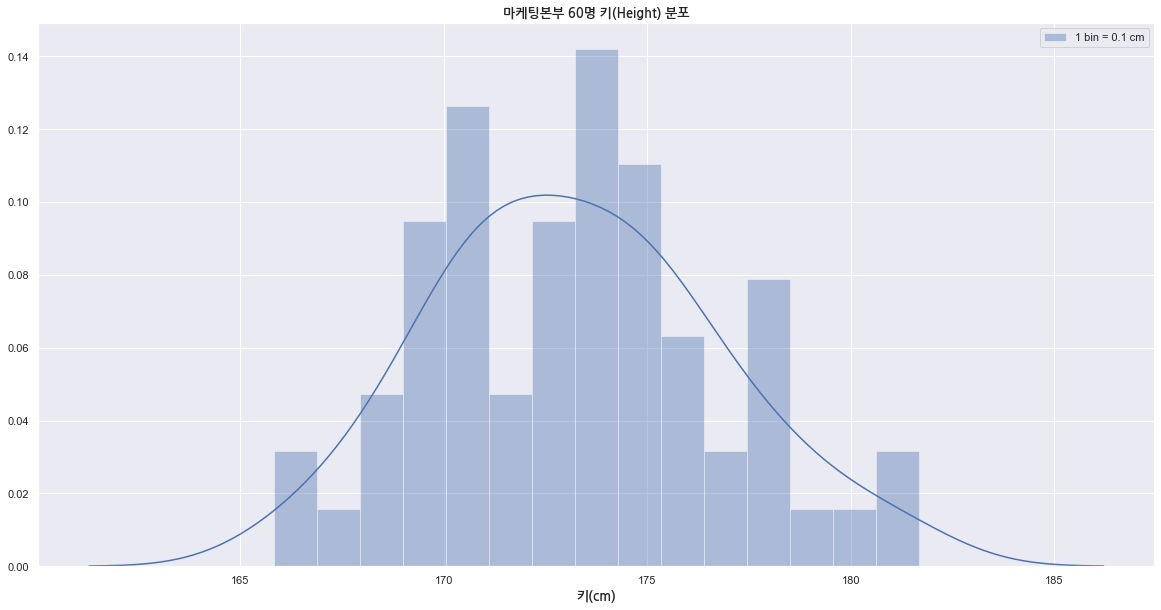

In [ ]:
np.random.seed(42)
x = np.array([160, 165, 175, 175, 180, 185])
population = [resample(x).mean() for _ in range(60)]
plot_dist(population, bins=1, kde=True, label='1 bin = 0.1 cm')
plot_title(title='마케팅본부 60명 키(Height) 분포', xlabel='키(cm)', ylabel='', fontproperties=fontprop, fontsize=13)
plt.legend();

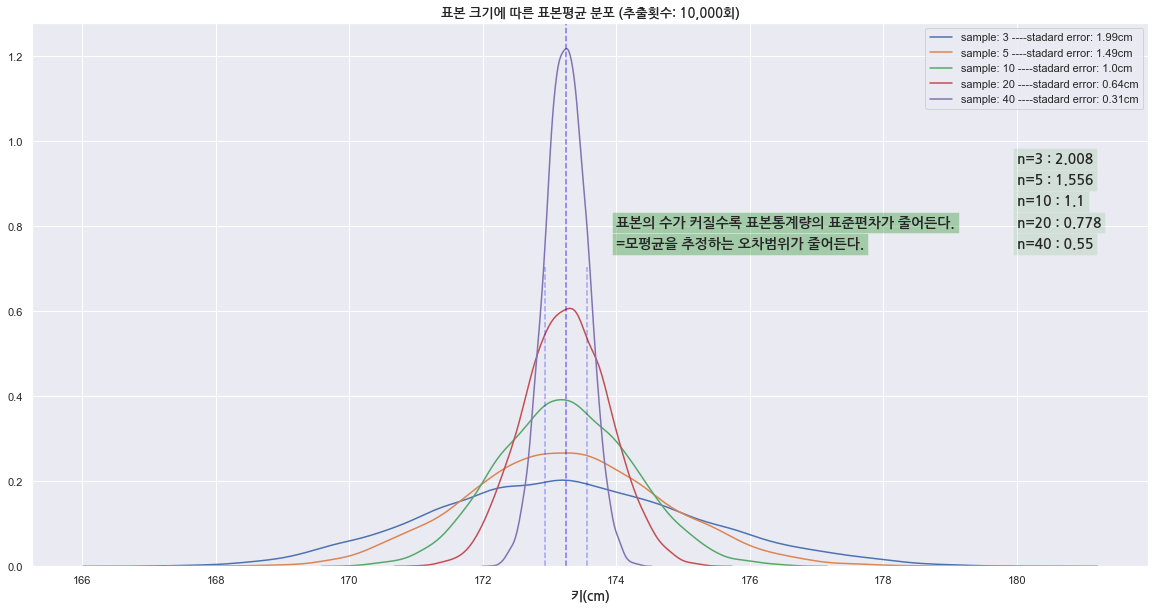

In [ ]:
from random import sample

np.random.seed(42)

for k in [3, 5, 10, 20, 40]:
  sample_mean = [np.mean(sample(population, k)) for _ in range(10000)]
  plot_dist(sample_mean, bins=10, hist=False, kde=True, label='sample: {}'.format(str(k)) +' ----stadard error: {}cm'.format(str(round(np.std(sample_mean), 2))))
plot_title(title='표본 크기에 따른 표본평균 분포 (추출횟수: 10,000회)', xlabel='키(cm)', ylabel='', fontproperties=fontprop, fontsize=13)
plt.text(x=174, y=0.8, s="표본의 수가 커질수록 표본통계량의 표준편차가 줄어든다.", bbox=dict(facecolor='green', alpha=0.3), fontproperties=fontprop, fontsize=14)
plt.text(x=174, y=0.75, s="=모평균을 추정하는 오차범위가 줄어든다.", bbox=dict(facecolor='green', alpha=0.3), fontproperties=fontprop, fontsize=14)
plt.axvline(np.median(sample_mean), 0, 1, color = 'blue', ls = '--', alpha = 0.5)
plt.axvline(np.median(sample_mean)-np.std(sample_mean), 0, 0.55, color='blue', ls='--', alpha=0.3)
plt.axvline(np.median(sample_mean)+np.std(sample_mean), 0, 0.55, color='blue', ls='--', alpha=0.3);

for i, j in zip(range(1, 6), [3, 5, 10, 20, 40]):
  plt.text(x=180, y=1 - i*0.05, s="n={} : {}".format(j, round(np.std(population)/np.sqrt(j), 3)), bbox = dict(facecolor='green', alpha=0.1), fontproperties=fontprop, fontsize=14);

- 회귀계수의 값이 우연인지 아닌지를 어떻게 t-test로 알 수 있을까?
- 두 그룹 간 평균의 차이
  - t-value = $ { \displaystyle \frac{\bar X_{group1} - \bar X_{group2}}{표준오차} } $
  - 여기의 표준오차는 무슨 의미인가? ➡︎ 두 그룹 간 평균 차이의 불확실도

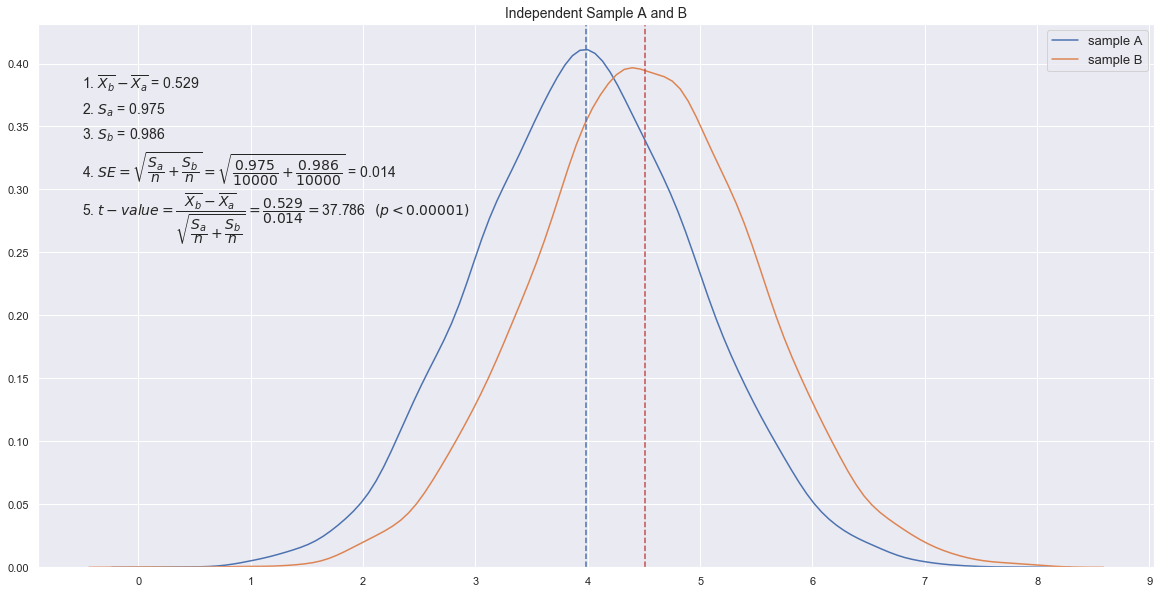

In [ ]:
np.random.seed(0)

a = np.random.randn(10000) + 4
b = np.random.randn(10000) + 4.5

plot_dist(x=a, bins=10, hist=False, kde=True, label='sample A')
plot_dist(x=b, bins=10, hist=False, kde=True, label='sample B')
plt.xticks(np.linspace(0, 9, 10))
plt.title('Independent Sample A and B', fontsize=14)
plt.axvline(np.mean(a), 0, 1, color = 'C0', ls = '--', alpha = 1)
plt.axvline(np.mean(b), 0, 1, color = 'C3', ls = '--', alpha = 1)

mean_diff = round(np.mean(b)-np.mean(a), 3)
var_a = round(np.var(a), 3)
var_b = round(np.var(b), 3)
se = round(np.sqrt((var_a/10000) + (var_b/10000)), 3)
t_value = round(mean_diff/se, 3)

plt.text(x=-0.5, y=0.38, s='1. $ \overline{X_b} - \overline{X_a} $ = '+ str(mean_diff), fontsize=14)
plt.text(x=-0.5, y=0.36, s='2. $ S_a $ = ' + str(var_a), fontsize=14)
plt.text(x=-0.5, y=0.34, s='3. $ S_b $ = ' + str(var_b), fontsize=14)
plt.text(x=-0.5, y=0.31, s='4. $ SE = \sqrt{\dfrac{S_a}{n} + \dfrac{S_b}{n}} = \sqrt{\dfrac{0.975}{10000} + \dfrac{0.986}{10000}} $ = ' + str(se), fontsize=14)
plt.text(x=-0.5, y=0.28, s='5. $ t-value = \dfrac {\overline{X_b} - \overline{X_a}} {\sqrt{\dfrac{S_a}{n} + \dfrac{S_b}{n}}} = \dfrac{0.529}{0.014} = $' + str(t_value), fontsize=14)
plt.text(x=2.1, y=0.28, s='$ (p < 0.00001) $', fontsize=14)
plt.legend(fontsize=13);

In [ ]:
#c = np.concatenate([a, b])
ax = [np.mean(resample(a)) for _ in range(10000)]
bx = [np.mean(resample(b)) for _ in range(10000)]

In [ ]:
ab = np.array(bx) - np.array(ax)

표준오차 x 1: 0.01383


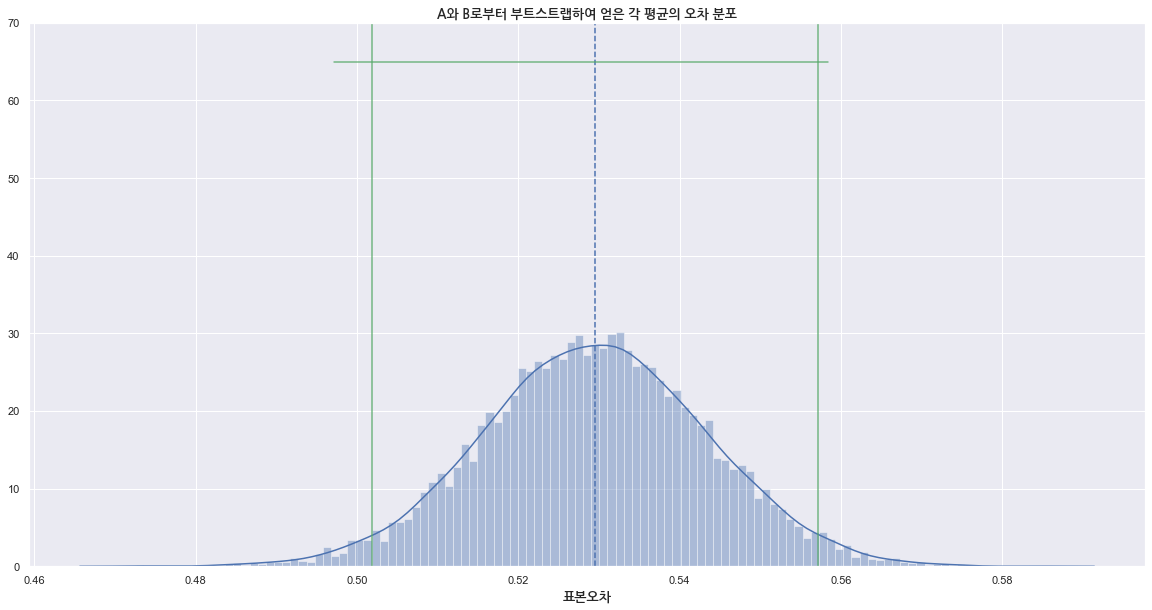

In [ ]:
plot_dist(x=ab, bins=1000, hist=True, kde=True)
plt.axvline(np.mean(ab), 0, 1, color = 'C0', ls = '--', alpha = 1)
plot_title(title='A와 B로부터 부트스트랩하여 얻은 각 평균의 오차 분포', xlabel='표본오차', ylabel='', fontproperties=fontprop, fontsize=13)
plt.ylim(0, 70)
plt.axvline(np.mean(ab) - np.std(ab)*2, 0, 1, color = 'C2', ls = '-', alpha = 0.8)
plt.axvline(np.mean(ab) + np.std(ab)*2, 0, 1, color = 'C2', ls = '-', alpha = 0.8)
plt.axhline(65, 0.273, 0.688 + np.std(ab)*2, color = 'C2', ls = '-', alpha = 0.8)
print("표준오차 x 1: {}".format(round(np.std(ab), 5)))
# print("표준오차 x 2: {}".format(round(np.std(ab) * 2, 5)))
# print("SciPy로 계산한 표준오차 x 1: {:.5f}".format(round(stats.sem(c), 5)))
# print("SciPy로 계산한 표준오차 x 2: {:.5f}".format(round(stats.sem(c)*2, 5)))

- 회귀분석에의 t-value는?
  - t-value = $ { \displaystyle \frac{\beta}{SE_\beta} = \frac{\color{yellow}{기울기}}{\color{orange}{표준오차}} } $
  - 아래 예시의 경우 $ { \displaystyle \color{yellow}{\frac{\bar X_{group2} - \bar X_{group1}}{1-0}} * \color{orange}{\frac{1}{표준오차}} } $

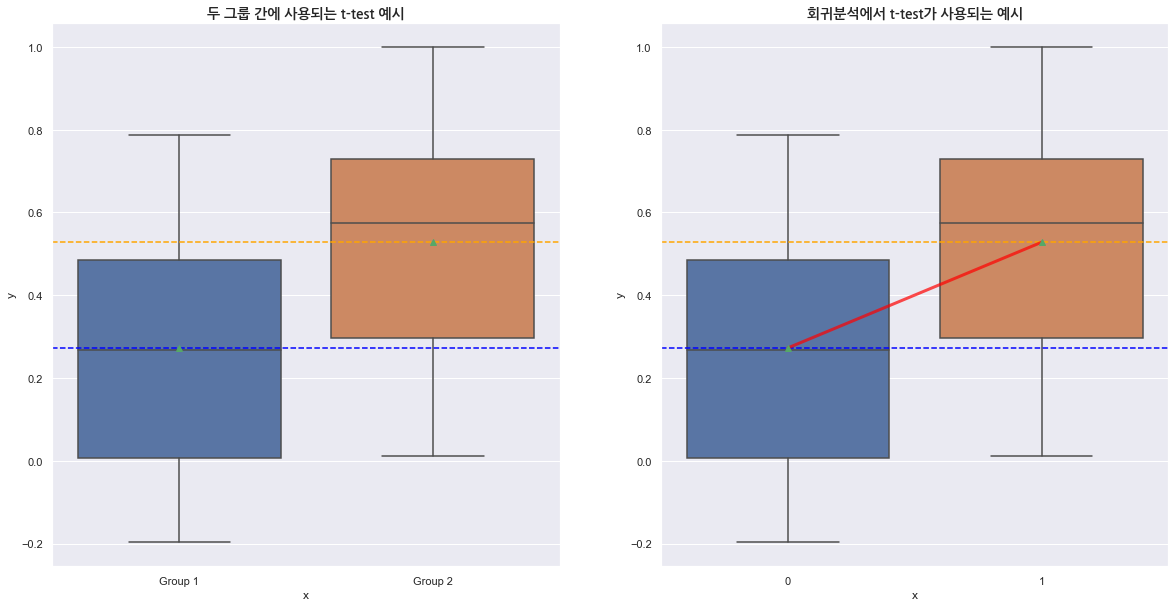

In [ ]:
sns.set(rc = {"figure.figsize": (20, 10)})
f, (ax1, ax2) = plt.subplots(1, 2)

np.random.seed(0)

a = np.random.random(100) - 0.2
b = np.random.random(100)

x = ['Group 1']*100 + ['Group 2']*100
y = np.concatenate([a, b])
df = pd.DataFrame({'x':x, 'y':y})

ax1 = sns.boxplot(data=df, x='x', y='y', showmeans=True, ax=ax1)
ax1.axhline(np.mean(b), 0, 1, color='orange', ls='--', alpha=1)
ax1.axhline(np.mean(a), 0, 1, color='blue', ls='--', alpha=1)
ax1.set_title('두 그룹 간에 사용되는 t-test 예시', fontproperties=fontprop, fontsize=14)
ax1.set_xticks(ticks=(0, 1))

# x = ['Group 1 = 0']*100 + ['Group 2 = 1']*100
x = ['0']*100 + ['1']*100
y = np.concatenate([a, b])
df = pd.DataFrame({'x':x, 'y':y})
ax2 = sns.boxplot(data=df, x='x', y='y', showmeans=True, ax=ax2)
ax2.set_title('회귀분석에서 t-test가 사용되는 예시', fontproperties=fontprop, fontsize=14)
ax2.axhline(np.mean(b), 0, 1, color='orange', ls='--', alpha=1)
ax2.axhline(np.mean(a), 0, 1, color='blue', ls='--', alpha=1)
ax2.plot([0, 1], [np.mean(a), np.mean(b)], 'k-', lw=3, color='red', alpha=0.7)
ax2.set_xticks(ticks=(0, 1));

- 회귀분석에서 t-test는 무엇을 테스트 한다는 의미인가?
  - 기울기가 0인지 아닌지를 테스트 하는 것임
    - 기울기 = 0: 독립변수가 증가해도 종속변수는 아무 변화가 없음 ➡︎ 유의하지 않음(독립변수가 원인으로 아무 역할을 못하므로) ➡︎ 표준오차가 아무리 작아도 아무 의미 없음
    - 기울기 ≠ 0: ?

- 회귀계수 t-test의 통계적 가설
  - 두 집단 비교
    - $ H_0: Mean_1 - Mean_2 = 0 $
    - $ H_1: Mean_1 - Mean_2 ≠ 0 $
  - 회귀분석
    - $ H_0: \beta = 0 $
    - $ H_0: \beta ≠ 0 $
    - 설령 기울기가 0이 아니라 해도 독립변수 $X$의 표준오차가 너무 커서 t-value가 작게 나온다면 사실상 기울기를 0으로 간주한다. 의미가 없기 때문임.

- 회귀분석 전 산포도(sctter plot)을 보아야 함
  - 직선형태의 데이터 분포가 나타나지 않는 경우 다른 방법을 찾아야 함
  - 왜냐하면 회귀분석이란 $y= a+bx$의 직선을 구하는 것이기 때문
  - <img src="../image/regression_example_2.png" align="left">

## R-Squared

- 회귀분석은 <span style="color:orange">종속변수의 분산을 독립변수로 얼마나 잘 설명할수 있는지</span>를 확인하는 과정이다

<img src="../image/r_square.png" align="left">

- $ R^2 = 1 - \frac{SSE}{SST} $
  - SST = $ \sum (y_i - \bar y_i)^2 $
  - SSE = $ \sum (y_i - \hat{y_i})^2 $

- $R^2$가 의미하는 것은 무엇이고 어떻게 해석해야 하나?
  - $R^2$는 모델의 분산 설명력이라고 볼 수 있음
  - 이는 우리가 만든 모델(즉, 독립변수)가 얼마나 데이터를 잘 설명했는지를 의미함
- <span style="color:orange">$R^2$가 높으면 무조건 좋은 것인가?</span>
  - 절대 그렇지 않음
  - 나름 의미는 있으나, 높은 $R^2$가 모든 것을 완벽하게 하지는 못함
    - $R^2$를 확인하기 전에 잔차도(residual plot)이 랜덤하게 분포하는지 확인해야 함 ➡︎ 잔차에 패턴이 있는 경우 $R^2$가 높아도 아무 의미가 없음
    - <span style="color:orange">의미 없는 독립변수의 추가 조차도 $R^2$를 약간이라도 증가시킴</span> ➡︎ 눈꼽만큼이라도 설명력이 생기므로 독립변수가 무한대로 증가하면 $R^2$는 증가함
    - 독립변수의 추가는 자유도 1을 손실하는 것임
    - 높은 $R^2$는 과적합(overfitting) 문제로부터 자유롭지 못함
- 그렇다면 $R^2$ 대신에 사용할 수 있는 것은?
  - 추가된 독립변수가 자유도 1을 잃고도 충분히 분산을 설명했는지의 여부를 알아야 함
  - 즉 자유도가 감안된 $R^2$가 필요한데 이를 $adj.R^2$라고 부름
  - $R^2$와 $adj.R^2$가 심하게 다르다면 의미 없는 독립변수를 너무 많이 넣었다는 의미임
- \$R^2$ 보다 중요한 것
  - <span style="color:orange">모델에 사용된 독립변수의 논리성/이론적 근거</span>

## 표준화계수

- 종속변수에 대한 독립변수들의 단위(scaling)을 통일시킨 계수
- 표준화계수의 단위(scaling)는 없어져 모든 독립변수를 같은 단위로 비교 가능 ➡︎ 독립변수 간 영향력을 비교할 수 있음 ➡︎ Feature Importance
- 표준화계수의 특징
  - 원점(0,0)을 지나가는 회귀직선
  - 절편이 0
  - 회귀계수의 크기 비교가 가능
  - 해석이 어렵다
- 모든 독립 변수를 표준화시킨 후 회귀분석 가능

- 표준화계수 계산법
  - 표준화계수 = 비표준화계수 x $ {\displaystyle \frac{SD_x}{SD_y} }$
  - $SD_x$ = 독립변수의 표준편차
  - $SD_y$ = 종속변수의 표준편차

- 문제점
  - 표준화계수로 크기를 비교할 수는 있으나 이 표준화계수의 차이가 우연히 발생한 것인지의 추가적인 테스트가 필요함

# 다중 선형회귀

- 예측변수가 여러 개인 경우를 다중선형회귀라 부른다.
- $ {\displaystyle Y = b_0 + b_1X_1 + b_2X_2 + ... + b_pX_p + e } $

In [ ]:
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']

house = pd.read_csv('./data/house_sales.csv', sep='\t')
house[subset].head()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
1,300805.0,2400,9373,3.00,6,7
2,1076162.0,3764,20156,3.75,4,10
3,761805.0,2060,26036,1.75,4,8
4,442065.0,3200,8618,3.75,5,7
5,297065.0,1720,8620,1.75,4,7


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
house[subset].describe()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
count,22687.000,22687.000,22687.000,22687.000,22687.000,22687.000
mean,565233.271,2080.166,11746.333,2.176,3.368,7.681
std,385402.860,913.742,29016.020,0.768,0.904,1.180
min,3368.000,370.000,494.000,0.000,0.000,3.000
25%,360563.000,1420.000,4800.000,1.750,3.000,7.000
50%,471315.000,1910.000,7200.000,2.250,3.000,7.000
75%,649411.000,2540.000,9794.000,2.500,4.000,8.000
max,11644855.000,10740.000,1024068.000,8.000,33.000,13.000


In [ ]:
# sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(house[subset], kind='reg')

In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')
    
print("주택에 1제곱피트를 추가하면 예상 가격이 대략 229달러 정도 증가할 것이다.")

Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.83060360240796
 SqFtLot: -0.06046682065307607
 Bathrooms: -19442.840398321056
 Bedrooms: -47769.95518521438
 BldgGrade: 106106.96307898083
주택에 1제곱피트를 추가하면 예상 가격이 대략 229달러 정도 증가할 것이다.


## 모형 평가

- RMSE = $ {\displaystyle \sqrt{\frac{\sum_{i=1}^n (y_i-\hat{y_i})}{n}}} $

- RSE = $ {\displaystyle \sqrt{\frac{\sum_{i=1}^n (y_i-\hat{y_i})}{n-p-1}}} $ (p=예측변수 개수)

In [ ]:
fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 261220
r2: 0.5406


In [ ]:
model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:53:49   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694

## 교차타당성검사(Cross-Validation)

- 전형적인 통계적 회귀 측정 지표들($R^2$, $F$-value, $p$-value)은 모두 표본 내 지표들이다. 표본의 모든 데이터를 사용하여 얻은 값이다.
- 이것만으로는 모델의 성능이 어느 정도인지 판단할 수가 없다.
- 따라서 일부 데이터를 떼어놓고 모델을 만든 후 떼어놓았던 것으로 모델을 테스트하여 성능을 검증할 수 있게 된다.

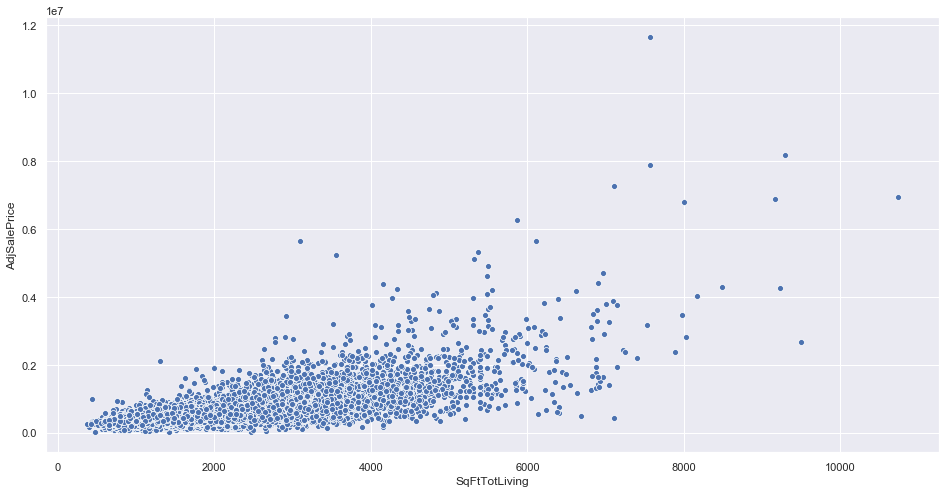

In [ ]:
sns.set(rc = {"figure.figsize": (16, 8)})
sns.scatterplot(data=house, x='SqFtTotLiving', y='AdjSalePrice');

In [ ]:
model = LinearRegression()
model.fit(house[['SqFtTotLiving']], house['AdjSalePrice'])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')
print('R-Squared: {}'.format(round(model.score(house[['SqFtTotLiving']], house['AdjSalePrice']), 3)))

Intercept: -44676.967
Coefficient Exposure: 293.203
R-Squared: 0.483


In [ ]:
x = house[['SqFtTotLiving', 'AdjSalePrice']].copy()
k = 10
n = int(x.shape[0] / k)
intercept = []
coef = []
r_square = []
rmse = []

idx = x.sample(n).index.tolist()
idx_filter=[]

for i in range(10):
  idx_filter.append(idx)
  
  X = x[~x.index.isin(idx)][['SqFtTotLiving']]
  Y = x[~x.index.isin(idx)]['AdjSalePrice']
  model = LinearRegression()
  model.fit(X, Y)
  
  intercept.append(model.intercept_)
  coef.append(round(model.coef_[0], 3))
  r_square.append(model.score(X, Y))
  y_real = x[x.index.isin(idx)]['AdjSalePrice'].values
  y_predict = model.predict(x.loc[x.index.isin(idx),['SqFtTotLiving']])
  error = np.sqrt((sum((y_real - y_predict)**2)/len(idx)))
  rmse.append(error)
  
  idx = x[~x.index.isin(idx_filter)].sample(n).index.tolist()

In [ ]:
pd.DataFrame({'intercept':intercept, 'coef': coef, 'r_square':r_square, 'rmse':rmse})

,intercept,coef,r_square,rmse
0,-48952.448,295.149,0.481,248922.177
1,-48792.251,295.350,0.481,242785.945
2,-43269.145,292.409,0.485,300735.586
3,-43628.398,292.771,0.479,259875.089
4,-37622.045,289.448,0.484,306540.245
5,-48849.791,295.546,0.479,239972.205
6,-46026.673,293.817,0.479,256291.369
7,-48943.542,295.373,0.482,239205.957
8,-48104.459,294.653,0.484,271153.232
9,-46158.895,294.367,0.484,270326.030


## 모형 선택 및 단계적 회귀

- 변수를 추가하면 RMSE는 감소하고, $R^2$는 증가한다.
- 마냥 변수를 계속 추가하면 측정 지표는 좋아질 수 있으나 유의하다고 보기 어려운 경우가 많다.
- 따라서 모델에 변수를 추가할수록 불이익을 주는 AIC를 사용한다.
- $ {\displaystyle \ AIC = 2P + n\log(\frac{RSS}{n}) }$
  - P: 변수의 개수
  - n: 행(record) 개수
- AIC를 최소화하는 방법?
  - All subset regression (부분집합)
  - Stepwise regression (단계적)
  - Forward selection (전진)
  - Backward selection (후진)
  - Penalized regression (벌점)
    - Ridge
    - Lasso

In [ ]:
pd.get_dummies(house[predictors], drop_first=True).head(3)

,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
1,2400,9373,3.000,6,7
2,3764,20156,3.750,4,10
3,2060,26036,1.750,4,8


In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 
              'NewConstruction']

X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:53:53   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving       

In [ ]:
y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, 
                                                verbose=True)

print()
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=628230.29, add YrBuilt
Step: score=627784.16, add Bedrooms
Step: score=627602.21, add Bathrooms
Step: score=627525.65, add PropertyType_Townhouse
Step: score=627525.08, add SqFtFinBasement
Step: score=627524.98, add PropertyType_Single Family
Step: score=627524.98, unchanged None

Intercept: 6178645.017
Coefficients:
 SqFtTotLiving: 199.27755304201884
 BldgGrade: 137159.56022619773
 YrBuilt: -3565.4249392492993
 Bedrooms: -51947.38367361318
 Bathrooms: 42396.164527717796
 PropertyType_Townhouse: 84479.16203300405
 SqFtFinBasement: 7.046974967553979
 PropertyType_Single Family: 22912.055187017682


## 가중회귀

In [ ]:
house.head(3)

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.931,300805.000,2,9373,...,3.000,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929,1076162.000,1,20156,...,3.750,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.978,761805.000,1,26036,...,1.750,4,8,1947,0,0,183000,275000,98166,False


In [ ]:
house['Year'] = [int(date.split('-')[0]) for date in house.DocumentDate]
house['Year'] = house.DocumentDate.apply(lambda d: int(d.split('-')[0]))
house['Weight'] = house.Year - 2005

In [ ]:
house[['DocumentDate', 'Year', 'Weight']].head(3)

,DocumentDate,Year,Weight
1,2014-09-16,2014,9
2,2006-06-16,2006,1
3,2007-01-29,2007,2


In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_wt = LinearRegression()
house_wt.fit(house[predictors], house[outcome], sample_weight=house.Weight)
pd.DataFrame({
    'predictor': predictors,
    'house_lm': house_lm.coef_,
    'house_wt': house_wt.coef_,
}).append({
    'predictor': 'intercept', 
    'house_lm': house_lm.intercept_,
    'house_wt': house_wt.intercept_,
}, ignore_index=True)

,predictor,house_lm,house_wt
0,SqFtTotLiving,228.831,245.024
1,SqFtLot,-0.060,-0.292
2,Bathrooms,-19442.840,-26085.970
3,Bedrooms,-47769.955,-53608.876
4,BldgGrade,106106.963,115242.435
5,intercept,-521871.368,-584189.329


   abs_residual_lm  abs_residual_wt  Year
1       123750.814       107108.554  2014
2        59145.413        96191.882  2006
3       190108.726       187004.493  2007
4       198788.774       196132.997  2008
5        91774.996        84277.578  2013
2006 140540.30358478572 146557.45463555606
2007 147747.57795863046 152848.52323463355
2008 142086.90594269993 146360.41166834175
2009 147016.7208834005 151182.92482502628
2010 163267.67488458726 166364.47615210718
2011 169937.3857441376 172950.87602774074
2012 169506.67005335906 171874.42426572405
2013 203659.77750995327 206242.19940256968
2014 184452.84066460104 186668.57375049705
2015 172323.43514674634 169842.74205317328


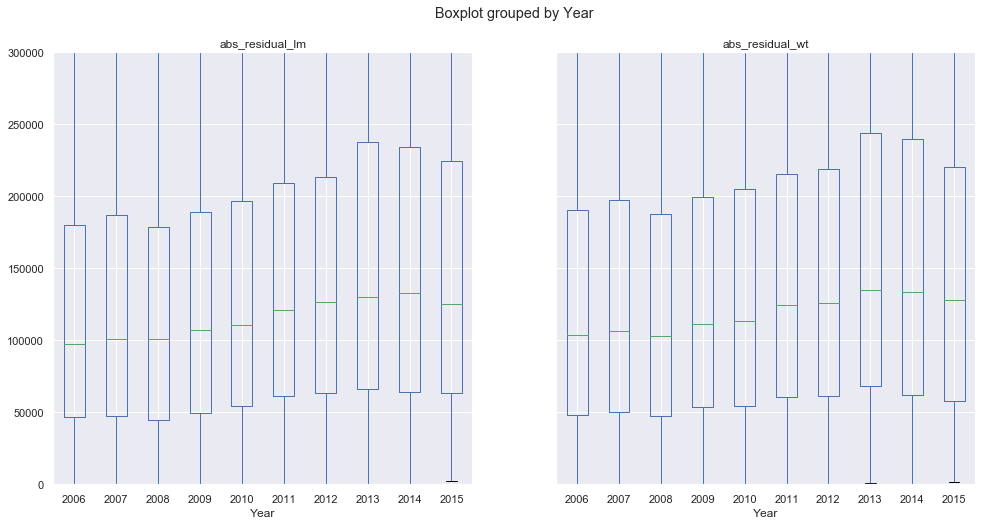

In [ ]:
residuals = pd.DataFrame({
    'abs_residual_lm': np.abs(house_lm.predict(house[predictors]) - house[outcome]),
    'abs_residual_wt': np.abs(house_wt.predict(house[predictors]) - house[outcome]),
    'Year': house['Year'],
})
print(residuals.head())
axes = residuals.boxplot(['abs_residual_lm', 'abs_residual_wt'], by='Year', figsize=(16, 8))
axes[0].set_ylim(0, 300000)

for year, group in residuals.groupby('Year'):
    print(year, np.mean(group['abs_residual_lm']), np.mean(group['abs_residual_wt']))

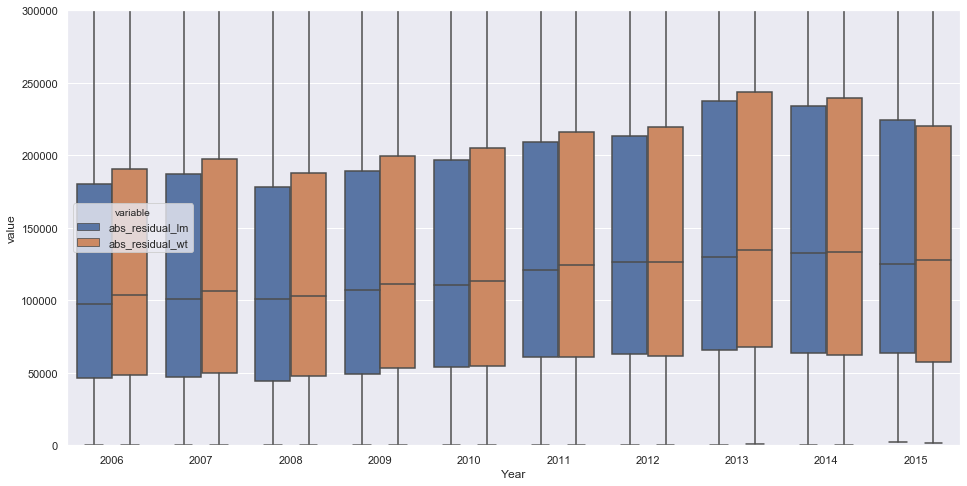

In [ ]:
sns.boxplot(data=residuals.melt(id_vars='Year', value_vars=('abs_residual_lm', 'abs_residual_wt')),
            x='Year', y='value', hue='variable')
plt.ylim(0, 300000);

# 회귀를 이용한 예측

## 외삽의 위험
- 외삽법(extrapolation): 모델링에 사용된 데이터 범위를 벗어난 부분까지 모델을 확장하는 것

## 신뢰구간과 예측구간

- 회귀계수와 예측 값의 신뢰구간을 알아본다.
  - 1. N개의 데이터가 있을 때 무작위로 한 행(row)을 뽑는다.
  - 2. 1번을 N번 반복하여 하나의 부트스트랩 재표본을 생성한다.
  - 3. 2번에서 얻어진 샘플로 회귀모형을 구하고 추정된 계수를 기록한다.
  - 4. 1~3번 과정을 1,000번 반복한다.
  - 5. 각 계수가 1,000개 씩 있으므로 각 계수의 90% 신뢰구간을 구한다. (백분위 5, 95 값)
  

In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:53:58   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving       

In [ ]:
X = house[['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'AdjSalePrice']]

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'
coef_df = pd.DataFrame()
for _ in range(1000):
  bootstrap_sample = pd.DataFrame()
  for _ in range(X.shape[0]):
    bootstrap_sample = bootstrap_sample.append(X.sample(n=1))

  house_reg = LinearRegression()
  house_reg.fit(bootstrap_sample[predictors], bootstrap_sample[outcome])
  coef_df = coef_df.append(pd.DataFrame(house_reg.coef_).T)
  
coef_df.columns = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'AdjSalePrice']

# 회귀에서의 요인변수

## 가변수 표현 (Dummy variable)

- Factor variable: 제한된 이산값을 가진 범주형 변수
- Indicator variable: 이진 변수(범주형 변수의 특수한 경우)
- 왜 Dummy variable을 사용할까?
  - 학력: 중졸/고졸/대졸/석사/박사 → 1/2/3/4/5 이렇게 바꾸면 안 되나?
- Dummy를 범주의 개수대로 만들면 어떻게 될까? 왜 '범주의 개수 - 1'의 컬럼을 만들까?
- 해석 방법
  - 해당 범주와 기준 그룹간의 유의한 차이가 있다/없다로 해석
  - 기존 그룹이 아닌 범주와는 비교 불가

In [ ]:
print(house.PropertyType.head())

1        Multiplex
2    Single Family
3    Single Family
4    Single Family
5    Single Family
Name: PropertyType, dtype: object


In [ ]:
print(pd.get_dummies(house['PropertyType']).head(6))

   Multiplex  Single Family  Townhouse
1          1              0          0
2          0              1          0
3          0              1          0
4          0              1          0
5          0              1          0
6          0              0          1


In [ ]:
print(pd.get_dummies(house['PropertyType'], drop_first=True).head(6))

   Single Family  Townhouse
1              0          0
2              1          0
3              1          0
4              1          0
5              1          0
6              0          1


In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType']

X = pd.get_dummies(house[predictors], drop_first=True)

house_lm_factor = LinearRegression()
house_lm_factor.fit(X, house[outcome])

print(f'Intercept: {house_lm_factor.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, house_lm_factor.coef_):
    print(f' {name}: {coef}')

Intercept: -446841.366
Coefficients:
 SqFtTotLiving: 223.37362892503822
 SqFtLot: -0.0703679813681255
 Bathrooms: -15979.013473415183
 Bedrooms: -50889.73218483028
 BldgGrade: 109416.3051614618
 PropertyType_Single Family: -84678.21629549256
 PropertyType_Townhouse: -115121.97921609186


In [ ]:
X

,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade,PropertyType_Single Family,PropertyType_Townhouse
1,2400,9373,3.000,6,7,0,0
2,3764,20156,3.750,4,10,1,0
3,2060,26036,1.750,4,8,1,0
4,3200,8618,3.750,5,7,1,0
5,1720,8620,1.750,4,7,1,0
...,...,...,...,...,...,...,...
27057,1480,5468,1.750,3,7,1,0
27058,4720,23914,4.500,4,11,1,0
27061,1070,11170,1.000,4,6,1,0
27062,1345,6223,2.000,3,7,1,0


## 다수의 수준을 갖는 요인변수들

In [ ]:
print(pd.DataFrame(house['ZipCode'].value_counts()).transpose())

         98038  98103  98042  98115  98117  98052  98034  98033  98059  98074  \
ZipCode    788    671    641    620    619    614    575    517    513    502   

         ...  98051  98024  98354  98050  98057  98288  98224  98043  98068  \
ZipCode  ...     32     31      9      7      4      4      3      1      1   

         98113  
ZipCode      1  

[1 rows x 80 columns]


In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])


zip_groups = pd.DataFrame([
    *pd.DataFrame({
        'ZipCode': house['ZipCode'],
        'residual' : house[outcome] - house_lm.predict(house[predictors]),
    })
    .groupby(['ZipCode'])
    .apply(lambda x: {
        'ZipCode': x.iloc[0,0],
        'count': len(x),
        'median_residual': x.residual.median()
    })
]).sort_values('median_residual')
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins=False)
zip_groups.head()
print(zip_groups.ZipGroup.value_counts().sort_index())

0    16
1    16
2    16
3    16
4    16
Name: ZipGroup, dtype: int64


In [ ]:
to_join = zip_groups[['ZipCode', 'ZipGroup']].set_index('ZipCode')
house = house.join(to_join, on='ZipCode')
house['ZipGroup'] = house['ZipGroup'].astype('category')

# 회귀방정식 해석

## 예측변수 상관관계

In [ ]:
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')
print("-------------------------------------------------------")
print("침실 개수가 많은 집일수록 집값이 낮다? 어떻게 이럴 수 있을까?")
print("집이 클수록 침실이 많은 경향이 있으며, 침실 수 보다는 주택의 크기가 집값에 더 큰 영향을 준다.")
print("똑같은 크기의 두 집이 있다고 하면, 작은 크기의 침실이 여러 개 있는 것을 선호하지 않는 것이 합리적이다.")

Intercept: 6178645.017
Coefficients:
 SqFtTotLiving: 199.27755304201884
 BldgGrade: 137159.56022619773
 YrBuilt: -3565.4249392492993
 Bedrooms: -51947.38367361318
 Bathrooms: 42396.164527717796
 PropertyType_Townhouse: 84479.16203300405
 SqFtFinBasement: 7.046974967553979
 PropertyType_Single Family: 22912.055187017682
-------------------------------------------------------
침실 개수가 많은 집일수록 집값이 낮다? 어떻게 이럴 수 있을까?
집이 클수록 침실이 많은 경향이 있으며, 침실 수 보다는 주택의 크기가 집값에 더 큰 영향을 준다.
똑같은 크기의 두 집이 있다고 하면, 작은 크기의 침실이 여러 개 있는 것을 선호하지 않는 것이 합리적이다.


In [ ]:
print("평 수, 욕실 수에 해당하는 변수를 제거하고 회귀모형을 확인한다.")
print("-------------------------------------------------------")
predictors = ['Bedrooms', 'BldgGrade', 'PropertyType', 'YrBuilt']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first=True)

reduced_lm = LinearRegression()
reduced_lm.fit(X, house[outcome])


print(f'Intercept: {reduced_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, reduced_lm.coef_):
    print(f' {name}: {coef}')

침실 수, 평 수, 욕실 수에 해당하는 변수를 제거하고 회귀모형을 확인한다.
-------------------------------------------------------
Intercept: 4913973.344
Coefficients:
 Bedrooms: 27150.537230215377
 BldgGrade: 248997.79366213758
 YrBuilt: -3211.7448621550866
 PropertyType_Single Family: -19898.495340502435
 PropertyType_Townhouse: -47355.4368733449


## 다중공선성(Multicollinearity)

- 상관관계가 매우 높은 독립변수들이 동시에 모델에 포함될 때 발생
- 왜 문제가 될까?
  - 만약 두 변수가 완벽하게 다중공선성에 걸려있다면 즉, $x_1 = b_2$ x $x_2$ 라면 같은 변수를 두 번 넣은 것임
  - 이는 최소제곱법 계산상 어려움이 발생함
- 완벽한 다중공선성이 아니어도 문제인가?
  - 회귀계수의 표준오차가 비정상적으로 커짐
  - 표준오차 ⬆︎ ⇢ t-value ⬇︎ ⇢ p-value ⬆︎
  - 다중공선성으로 인해 유의해야할 변수가 유의하지 않게 될 가능성이 커짐
---
- 다중공선성을 어떻게 찾아낼까?
  - 1) 산포도 & 상관계수
    - 두 독립변수가 심각하게 상관관계가 높다면 다중공선성의 문제가 있을 수 있음
    - 만약 상관계수가 0.9를 넘는다면 완전 다중공선성이라고 봐도 무방함
  - 2) 허용/공차(tolerance)를 확인
    - 한 개의 독립변수를 종속변수로 사용하고 나머지 변수들을 독립변수로 하는 회귀분석을 했을 떄 $R^2$를 확인함
    - 만약 $R^2$가 1이라면 독립변수 간에 심각한 상관관계가 있음을 의미
  - 3) 분산팽창지수(VIF: Variance Inflation Factor)
    - VIF = $\frac{1}{1-R^2}$
    - VIR가 크면 다중공선성이 크다는 의미
    - 독립변수가 연속형일 때는 VIF가 10보다 클 경우 다중공선성이라고 봄
    - 독립변수가 더미형일 때는 VIF가 3보다 클 경우 다중공선성이라고 봄
  - 4) 상태지수(Condition Index)
    - 흔하게 사용하지는 않음
    - 100이상이면 심각한 다중공선성 존재
---
- 다중공선성이 발생하면 어떻게 해결해야 하나?
  - 1) 다중공선성이 큰 변수가 유의한지 아닌지 확인 필요
    - 다중공선성이 있음에도 불구하고 해당 독립변수가 유의하다면? 표준오차가 비정상적으로 팽창되었음에도 유의하다는 의미 ⇢ 그 자체로 매우 유의하다는 것이 되어 그대로 두어도 무방함
    - 간혹 이것도 문제가 될 수 있다곤 하나, 100%에 가까운 다중공선성이 아닌 한 크게 문제가 되지 않음
    - 교란(Interaction)변수를 추가하여 의도적으로 다중공선성을 낮춤
  - 2) 해당 변수를 제거
    - 가장 일반적인 방법이긴 하나 해당변수가 연구의 중심이되는 중요하 변수일 경우 문제가 됨
    - 예를 들어, 주문 수 변수가 주요 관심사였는데 다중공선성이 존재할 수 있음
  - 3) 주성분분석(PCA)로 변수룰 재조합
    - 주성분분석은 겹치는 분산을 제거하는 효과가 있음
    - 문제는 제거된 분산이 꼭 겹치는 것만은 아니어서 경우에 따라 재조합된 변수들이 예측에서 이상한 결과는 내는 경우가 있음
  - 4) 다중공선성이 발생한 독립변수들을 합친다
  - 5) 능형 회귀분석
  - 6) Mean centering 방법
    - 모든 변수를 각 변수의 평균값으로 뺀 뒤에 회귀분석을 하는 방법
---
- 다중공선성을 해결하는 '완벽한' 방법은 존재하지 않음
- 항상 여러 방법을 시도하면서 모델에 가장 적합한 것이 무엇인지를 찾아야 함
---
- 다중공선성은 트리, 클러스터링, 최근접 이웃 알고리즘 등 회귀 유형이 아닌 분류 방법에서는 그다지 문제가 되지 않는다.
- 이 방법에서는 더미변수를 P-1개가 아닌 P개를 유지하는 것이 오히려 좋다.

## 교란변수(Confounding variables)

- 교란변수는 회귀방정식에 중요한 변수가 포함되지 못해서 생기는 문제임

In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'PropertyType', 'ZipGroup']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first=True)

confounding_lm = LinearRegression()
confounding_lm.fit(X, house[outcome])

print(f'Intercept: {confounding_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, confounding_lm.coef_):
    print(f' {name}: {coef}')

print("-------------------------------------------------------")
print("ZipGroup이 분명 중요한 변수라는 것을 알 수 있으며, 이전과 다르게 SqFtlot과 Bathrooms의 계수가 양수가 되었음을 알 수 있다.")
print("Bedrooms 계수는 여전히 음수인데, 이것은 부동산 업계에서 잘 알려진 현상이라고 한다. 살기 좋은 지역에서는 욕실 수가 같은 주택의 경우 작은 침실이 여러 개 있으면 오히려 집 값이 떨어진다.")

Intercept: -666637.469
Coefficients:
 SqFtTotLiving: 210.61266005580157
 SqFtLot: 0.45498713854659023
 Bathrooms: 5928.425640001543
 Bedrooms: -41682.87184074475
 BldgGrade: 98541.18352725971
 PropertyType_Single Family: 19323.625287919334
 PropertyType_Townhouse: -78198.72092762387
 ZipGroup_1: 53317.17330659817
 ZipGroup_2: 116251.58883563544
 ZipGroup_3: 178360.53178793355
 ZipGroup_4: 338408.60185652005
-------------------------------------------------------
ZipGroup이 분명 중요한 변수라는 것을 알 수 있으며, 이전과 다르게 SqFtlot과 Bathrooms의 계수가 양수가 되었음을 알 수 있다.
Bedrooms 계수는 여전히 음수인데, 이것은 부동산 업계에서 잘 알려진 현상이라고 한다. 살기 좋은 지역에서는 욕실 수가 같은 주택의 경우 작은 침실이 여러 개 있으면 오히려 집 값이 떨어진다.


## 상호작용과 주효과 (Interactions and Main Effects)

- 주택위치에 의한 가격과 제곱피트당 가격이 상호작용으로 만들어진 회귀계수를 해석할 수 있어야 한다

In [ ]:
model = smf.ols(formula='AdjSalePrice ~  SqFtTotLiving*ZipGroup + SqFtLot + ' +
     'Bathrooms + Bedrooms + BldgGrade + PropertyType', data=house)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3247.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:54:06   Log-Likelihood:            -3.1098e+05
No. Observations:               22687   AIC:                         6.220e+05
Df Residuals:                   22671   BIC:                         6.221e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

# 가정 검정: 회귀 진단
- Testing the Assumptions: Regression Diagnostics

- 설명을 위한 연구 목적의 모델링에서는 각 독립변수들이 모델에 얼마나 적합한지를 평가해야 한다.
- 이를 위해 모델을 뒷받침하는 가정들을 검정할 수 있는 <span style="color:orange">잔차 분석</span>을 기본으로 한다.
- 직접적으로 예측 정확도를 다루는 것은 아니나, 예측 설정에 중요한 통찰력을 줄 수 있다.



## 특잇값(outlier)

- 표준화잔차 = $ { \displaystyle \frac{잔차}{표준오차} }$ = 회귀선으로부터 떨어진 정도를 표준오차 개수로 표현한 값
- 특잇값을 정상값과 구분하는 명확한 통계 이론은 없다. 경험을 통해 판단하는 경우가 많다.

In [ ]:
house_98105 = house.loc[house['ZipCode'] == 98105, ]

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade']
outcome = 'AdjSalePrice'

house_outlier = sm.OLS(house_98105[outcome], house_98105[predictors].assign(const=1))
result_98105 = house_outlier.fit()
print(result_98105.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     238.7
Date:                Tue, 21 Jul 2020   Prob (F-statistic):          1.69e-103
Time:                        21:54:08   Log-Likelihood:                -4226.0
No. Observations:                 313   AIC:                             8464.
Df Residuals:                     307   BIC:                             8486.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   209.6023     24.408      8.587

In [ ]:
influence = OLSInfluence(result_98105)
sresiduals = influence.resid_studentized_internal

print(sresiduals.idxmin(), sresiduals.min())

24333 -4.32673180407856


In [ ]:
print(result_98105.resid.loc[sresiduals.idxmin()])

-757753.6192115822


In [ ]:
outlier = house_98105.loc[sresiduals.idxmin(), :]
print('AdjSalePrice', outlier[outcome])
print(outlier[predictors])

AdjSalePrice 119748.0
SqFtTotLiving    2900
SqFtLot          7276
Bathrooms       3.000
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


- 새로운 데이터를 예측하기 위한 회귀분석에서는 특잇값이 매우 큰 문제가 되진 않는다.
- 그러나 특잇값을 찾는 것이 주 목적인 경우, 예를 들어 금융 사기와 같은 것들을 예측할 때는 아주 중요하게 관찰해야 한다.

## 영향값
- Influential values

- 회귀모형에서 특정 데이터가 제외됐을 때 모델에 큰 변화를 가져오는 값을 주영향관측값(Influential observation)이라고 한다.
- 회귀모형에 큰 변화를 주는 데이터를 찾는 방법
  - cook‘s distance
  - hat-value

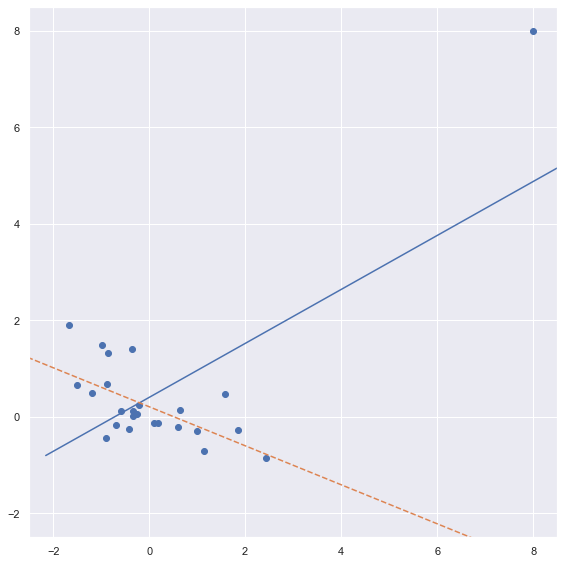

In [ ]:
from scipy.stats import linregress

np.random.seed(5)
x = np.random.normal(size=25)
y = -x / 5 + np.random.normal(size=25)
x[0] = 8
y[0] = 8

def abline(slope, intercept, ax):
    """Calculate coordinates of a line based on slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope * x_vals)

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y)
slope, intercept, _, _, _ = linregress(x, y)
ax.plot(*abline(slope, intercept, ax))
slope, intercept, _, _, _ = linregress(x[1:], y[1:])
ax.plot(*abline(slope, intercept, ax), '--')
ax.set_xlim(-2.5, 8.5)
ax.set_ylim(-2.5, 8.5)

plt.tight_layout()
plt.show()

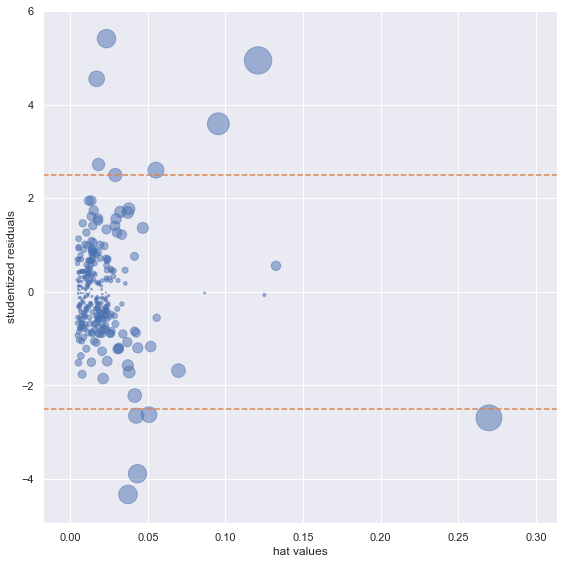

In [ ]:
influence = OLSInfluence(result_98105)
fig, ax = plt.subplots(figsize=(8, 8))
ax.axhline(-2.5, linestyle='--', color='C1')
ax.axhline(2.5, linestyle='--', color='C1')
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal, 
           s=1000 * np.sqrt(influence.cooks_distance[0]),
           alpha=0.5)

ax.set_xlabel('hat values')
ax.set_ylabel('studentized residuals')

plt.tight_layout()
plt.show()

In [ ]:
mask = [dist < .08 for dist in influence.cooks_distance[0]]
house_infl = house_98105.loc[mask]

ols_infl = sm.OLS(house_infl[outcome], house_infl[predictors].assign(const=1))
result_infl = ols_infl.fit()

pd.DataFrame({
    'Original': result_98105.params,
    'Influential removed': result_infl.params,
})

,Original,Influential removed
SqFtTotLiving,209.602,230.053
SqFtLot,38.933,33.142
Bathrooms,2282.264,-16131.880
Bedrooms,-26320.269,-22887.865
BldgGrade,130000.100,114870.560
const,-772549.862,-647137.097


## 이분산성, 비정규성, 오차 간 상관
- Heteroskedasticity, Non-Normality and Correlated Errors


- 잔차의 분포는 p-value와 관련이 있다. 예측 정확도를 중요하게 생각하는 데이터 과학자들에게는 별로 중요하지 않다. (정말?)
- 데이터 과학자는 잔차에 대한 가정을 기반으로 예상 값의 신뢰구간을 계산하는 방법이다.
---
- 이분산, 즉 분산이 다르다는 것인데 어떤 분산이 다르다는 것인가?
  - 회귀계수의 표준오차(분산)가 동일하지 않고 변한다는 것임
- 이것이 왜 문제일까?
  - 회귀계수의 유의성은 t-value로 계산되는데, 이 때 표준오차가 이분산성을 띄게 되면 하나의 수로 나타낼 수 없어서 유의한지 알 수 없게 됨
- 이분산성을 어떻게 확인할까?
  - 산포도/잔차도
  - White test 등
- 해결방법
  - Robust staandard error
  - WLS regression

In [ ]:
house_98105.head(1)

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,Year,Weight,ZipGroup
1036,2007-08-16,825000,394500005,Multiplex,2007-08-01,434600,0.999,826139.000,2,7245,...,1961,0,2,280000,468000,98105,False,2007,2,4


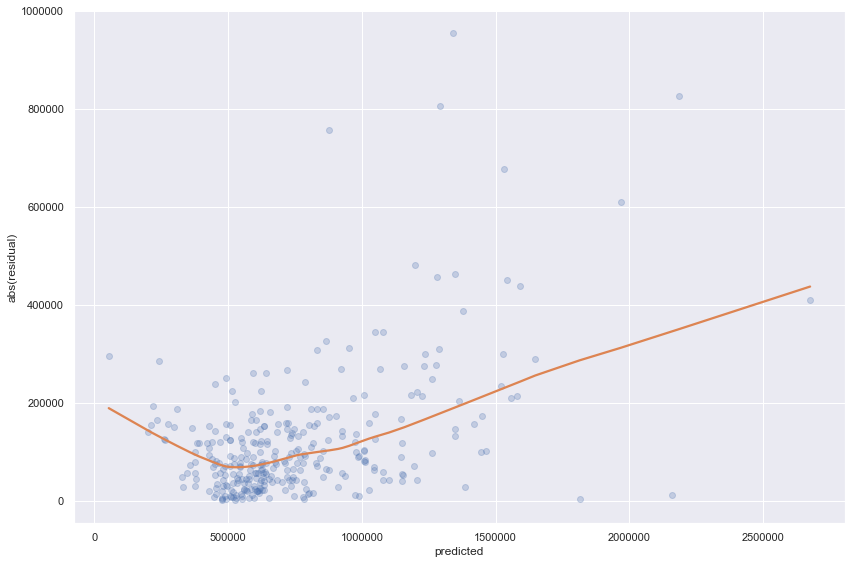

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.regplot(result_98105.fittedvalues, np.abs(result_98105.resid), 
            scatter_kws={'alpha': 0.25},
            line_kws={'color': 'C1'},
            lowess=True, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('abs(residual)')

plt.tight_layout()
plt.show()

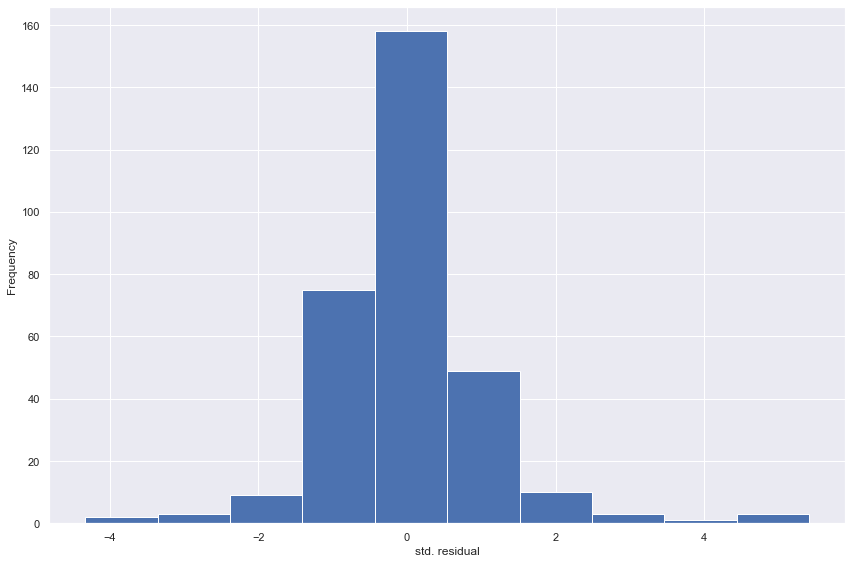

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
pd.Series(influence.resid_studentized_internal).hist(ax=ax)
ax.set_xlabel('std. residual')
ax.set_ylabel('Frequency')


plt.tight_layout()
plt.show()

## 편잔차그림과 비선형성
- Partial Residual Plots and Nonlinearity

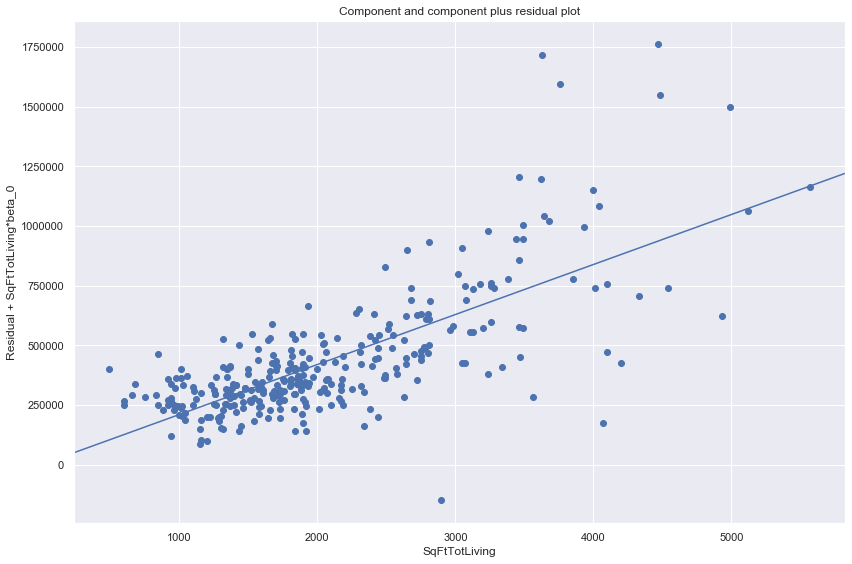

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(result_98105, 'SqFtTotLiving', ax=ax)

plt.tight_layout()
plt.show()

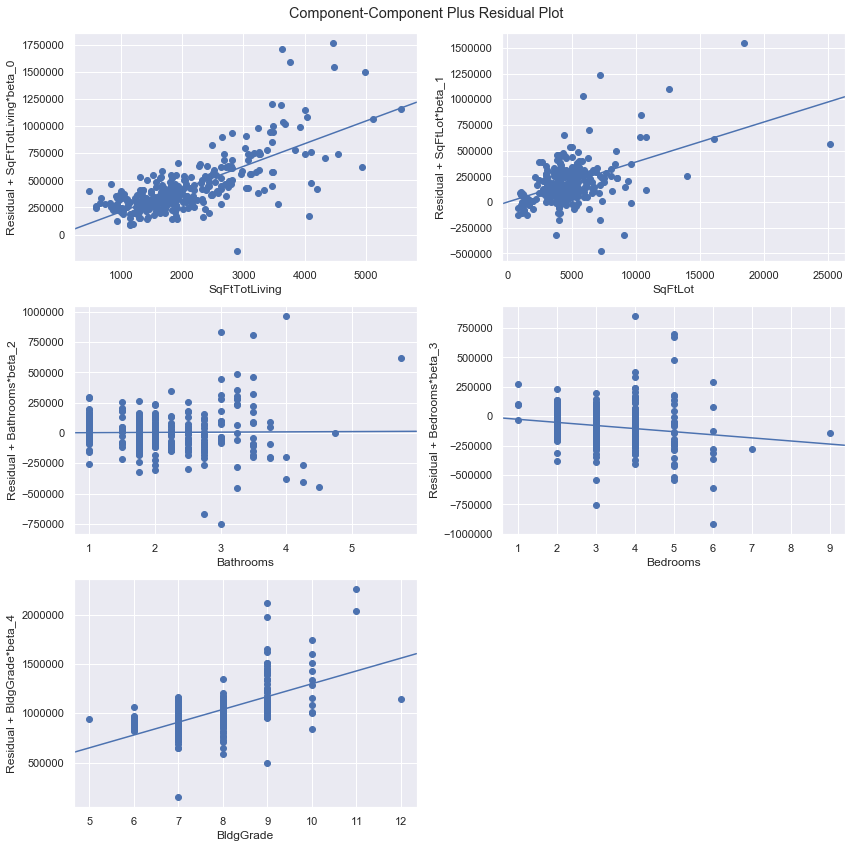

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig = sm.graphics.plot_ccpr_grid(result_98105, fig=fig)

# 다항회귀와 스플라인 회귀

## 다항식

## 스플라인

## 일반화가법모형